In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris.data
Y = iris.target

In [6]:
X[0] # [sepal length(花萼長), sepal width(花萼寬), petal length(花瓣長), petal width(花瓣寬)]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
X[0][2:]

array([1.4, 0.2])

In [8]:
# 為簡化，只取花瓣長寬
X = X[:, 2:]
X[0]

array([1.4, 0.2])

In [9]:
Y # 花的三種亞種

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 22)
# random_state: 把每次隨機的值固定，這樣比較好分析該次的訓練適不適合

### 用training data訓練(電腦已知)出來的分類

Text(0.5, 1.0, 'Sorted by class(only training data)')

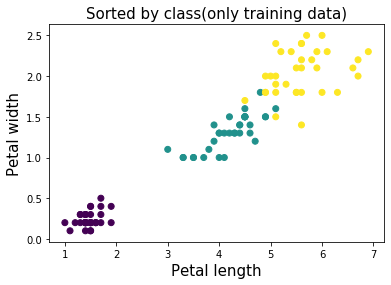

In [12]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train) # y_train即為從Y抽固定的70%出來
plt.xlabel("Petal length", fontsize=15)
plt.ylabel("Petal width", fontsize=15)
plt.title("Sorted by class(only training data)", fontsize=15)

In [13]:
from sklearn.svm import SVC

In [14]:
clf = SVC()

In [15]:
clf.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
y_predict = clf.predict(x_test)

### 用 testing data 預測(電腦未知)出來的分類

Text(0.5, 1.0, 'Sorted by class(testing data)')

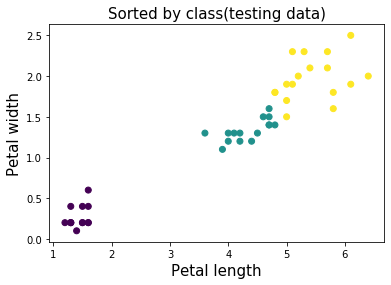

In [17]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict)
plt.xlabel("Petal length", fontsize=15)
plt.ylabel("Petal width", fontsize=15)
plt.title("Sorted by class(testing data)", fontsize=15)

### 但這樣不足以判斷預測是否準確

Text(0.5, 1.0, 'Sorted by class(testing data)')

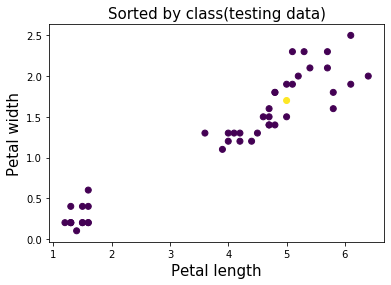

In [18]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict - y_test) # y_test為正解
plt.xlabel("Petal length", fontsize=15)
plt.ylabel("Petal width", fontsize=15)
plt.title("Sorted by class(testing data)", fontsize=15)

### 若預測正確，則 y_predict - y_test = 0(一種顏色，此處為紫)，否則非0(另一種顏色)

## 用contourf畫圖

In [29]:
x1, x2 = np.meshgrid(np.arange(0, 7, 0.02), np.arange(0, 3, 0.01)) # arange(start, end, 公差)

In [30]:
x1

array([[0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       ...,
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98],
       [0.  , 0.02, 0.04, ..., 6.94, 6.96, 6.98]])

In [31]:
x2

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [2.97, 2.97, 2.97, ..., 2.97, 2.97, 2.97],
       [2.98, 2.98, 2.98, ..., 2.98, 2.98, 2.98],
       [2.99, 2.99, 2.99, ..., 2.99, 2.99, 2.99]])

In [33]:
ex1 = [1, 2, 3, 4]
ex2 = [5, 6, 7, 8]
np.c_[ex1, ex2] # 作用同zip(ex1, ex2)

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [34]:
Z = clf.predict(np.c_[x1.ravel(), x2.ravel()])

In [35]:
Z = Z.reshape(x1.shape)

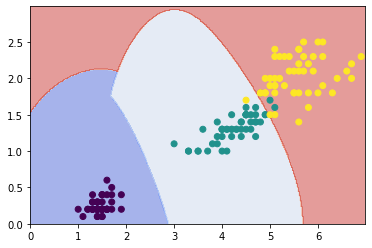

In [41]:
plt.contourf(x1, x2, Z, cmap=plt.cm.coolwarm, alpha=0.5) # contourf(x座標, y座標, 如何塗色/分類[, cmap(主題), alpha(不透明度)=0~1])
plt.scatter(X[:, 0], X[:, 1], c=Y)